In [ ]:
!pip install fiftyone
import fiftyone as fo
from fiftyone import ViewField as F


In [11]:
# load the dataset
import os

cwd = os.getcwd()
# print(cwd)
data_path = cwd + "/output_data/coco/images/"
labels_path = cwd + "/output_data/coco/instances.json"


dataset_type = fo.types.COCODetectionDataset

dataset = fo.Dataset.from_dir(
    data_path=data_path,
    labels_path=labels_path,
    dataset_type = dataset_type,

)

 100% |█████████████████| 505/505 [35.1s elapsed, 0s remaining, 17.1 samples/s]      



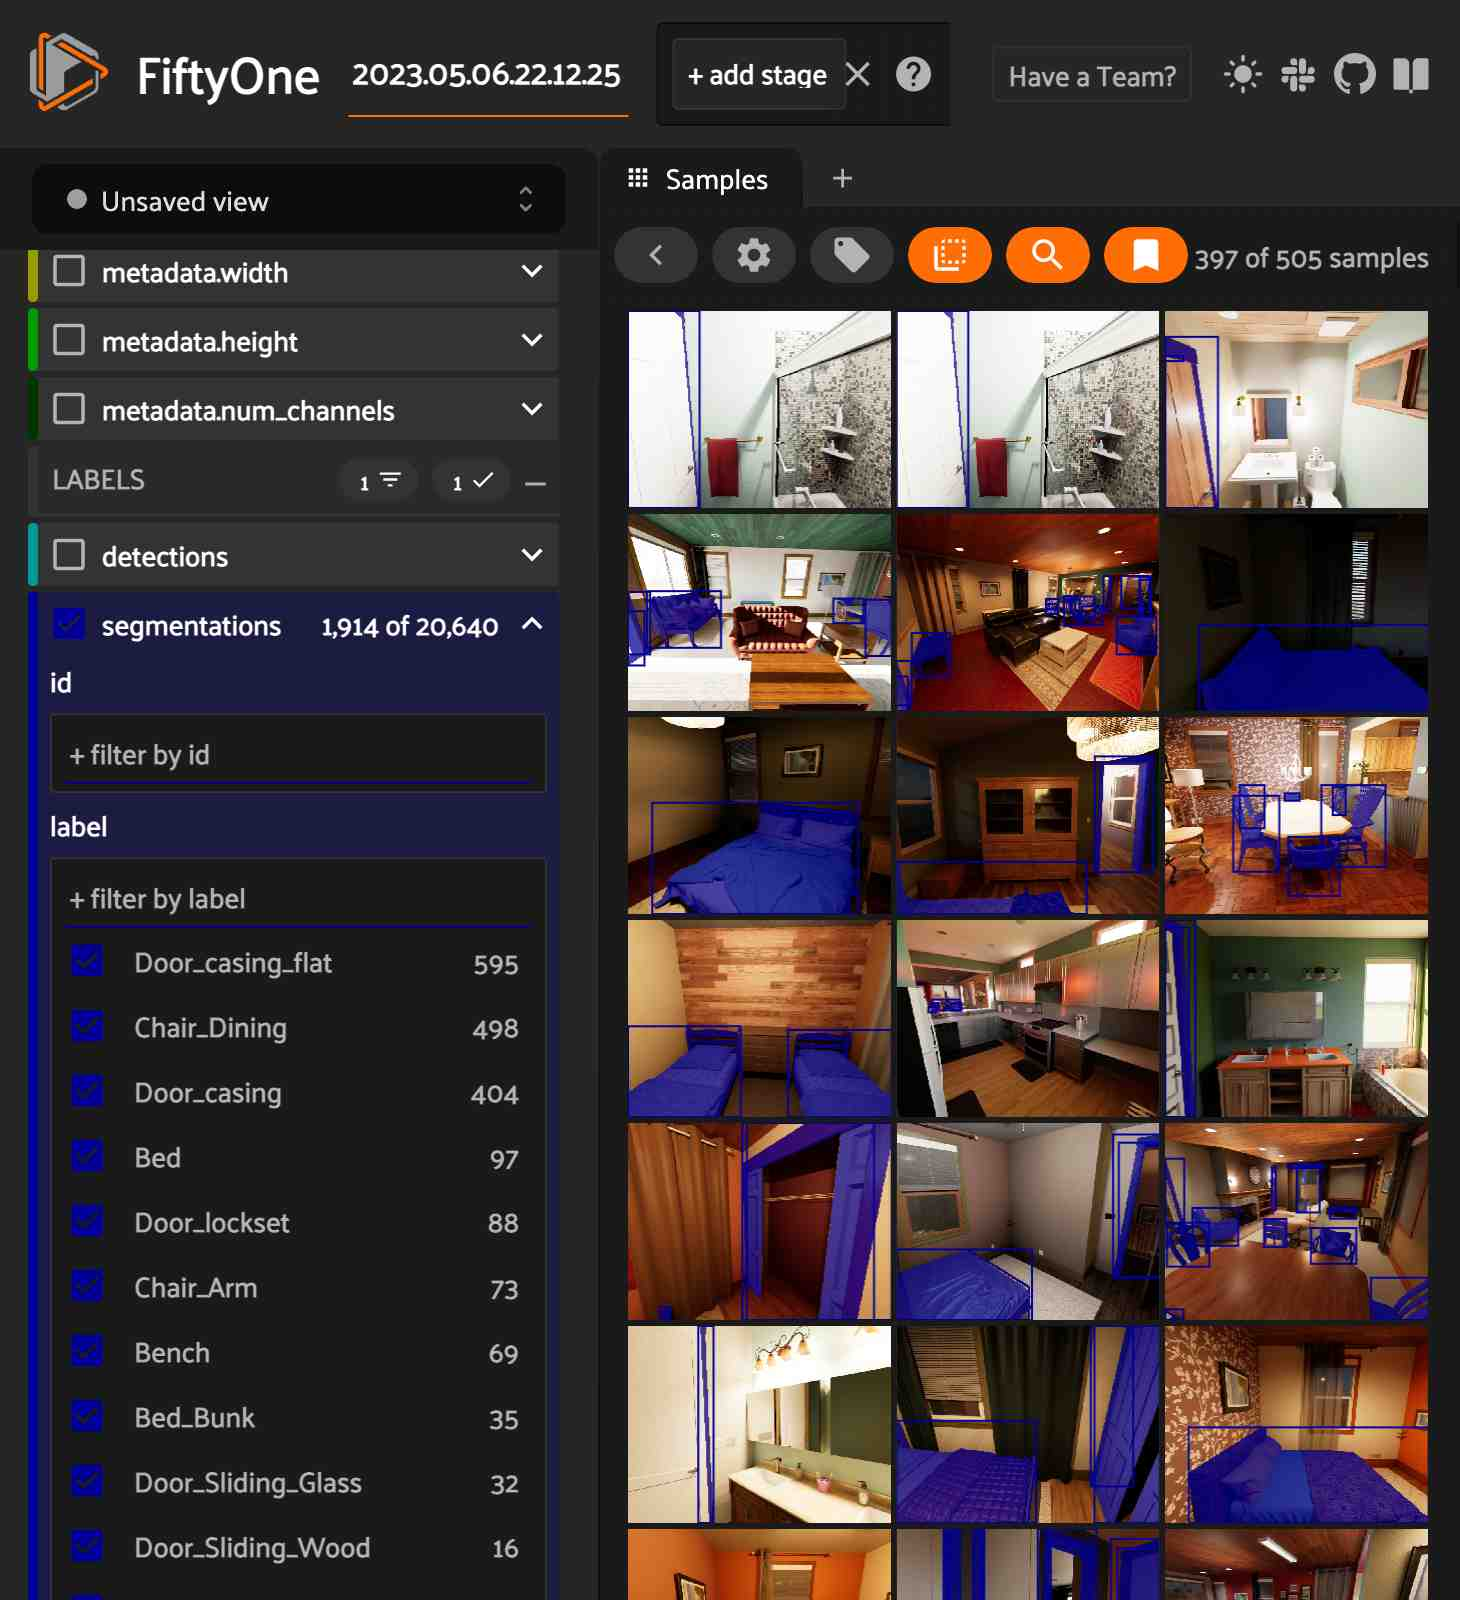

In [46]:
session = fo.launch_app(dataset)


In [47]:
# Make a copy for easier modifications
# dataset1 = dataset.copy()
dataset1=dataset
# Sort by class

# print labels
dataset1 = dataset1.map_labels("segmentations", {"Bed": "Bed", "Bed_Bunk": "Bed"})
dataset1 = dataset1.map_labels("segmentations", {"Bench": "Bench"})
dataset1 = dataset1.map_labels("segmentations", {"Chair_Lounge": "Chair", "Chair_Club": "Chair", "Chair_Arm": "Chair", "Chair_Dining": "Chair"})
dataset1 = dataset1.map_labels("segmentations", {"Door_Sliding_Glass": "Door", "Door_Sliding_Wood": "Door", "Door_lockset": "Door", "Door_casing": "Door", "Door_casing_flat": "Door"})
dataset1 = dataset1.map_labels("segmentations", {"Appliance_microwave": "Microwave", "Appliance_refrigerator": "Refrigerator", "Appliance_refrigerator_top-freezer": "Refrigerator"})
dataset1 = dataset1.map_labels("segmentations", {"Sofa": "Sofa"})
dataset1 = dataset1.map_labels("segmentations", {"Table_End": "Table", "Table_Dining": "Table", "Table_Console": "Table", "Table_Coffee": "Table"})

dataset1 = dataset1.filter_labels("segmentations", F("label").is_in(["Bed", "Bench", "Chair", "Door", "Microwave", "Refrigerator", "Sofa", "Table"]))

# # # Note: Window_glass has a corrupted label
# # # Note: Dresser has a corrupted label

# After training is complete, going to train on top of existing model with sampleset of windows and doors 


print(dataset1)

# Include only segmentations
dataset1 = dataset1.exclude_fields("detections").exclude_fields("keypoints")

# Launch as web app

session = fo.launch_app(dataset1)



Dataset:     2023.05.06.22.12.25
Media type:  image
Num samples: 434
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    keypoints:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Keypoints)
View stages:
    1. MapLabels(field='segmentations', map={'Bed': 'Bed', 'Bed_Bunk': 'Bed'})
    2. MapLabels(field='segmentations', map={'Bench': 'Bench'})
    3. MapLabels(field='segmentations', map={'Chair_Arm': 'Chair', 'Chair_Club': 'Chair', 'Chair_Dining': 'Chair', ...})
    4. MapLabels(field='segmentations', map={'Door_Sliding_Glass'

In [48]:
# train_test_split

import fiftyone.utils.random as four

print(dataset1)

view1, view2 = four.random_split(dataset1, [0.8, 0.2])

# print(view1)
# print(view2)

view1.export(
    export_dir=cwd + "/train",
    dataset_type=fo.types.COCODetectionDataset,
    label_field="segmentations",
    overwrite=True,
)

view2.export(
    export_dir=cwd + "/val",
    dataset_type=fo.types.COCODetectionDataset,
    label_field="segmentations",
    overwrite=True,
)



Dataset:     2023.05.06.22.12.25
Media type:  image
Num samples: 434
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. MapLabels(field='segmentations', map={'Bed': 'Bed', 'Bed_Bunk': 'Bed'})
    2. MapLabels(field='segmentations', map={'Bench': 'Bench'})
    3. MapLabels(field='segmentations', map={'Chair_Arm': 'Chair', 'Chair_Club': 'Chair', 'Chair_Dining': 'Chair', ...})
    4. MapLabels(field='segmentations', map={'Door_Sliding_Glass': 'Door', 'Door_Sliding_Wood': 'Door', 'Door_casing': 'Door', ...})
    5. MapLabels(field='segmentations', map={'Appliance_microwave': 'Microwave', 'Appliance_refrigerator': 'Refrigerator'